In [ ]:
import pandas as pd
from google.colab import drive
import os

drive.mount('/content/drive')

input_directory = '/content/drive/MyDrive/projects/Generative AI-Text'

# Read the dataframe
df = pd.read_csv(os.path.join(input_directory, 'elon_musk_tweets.csv'))

In [2]:
# Specify the column names you want to keep
columns_to_keep = ['text', 'date', 'retweets',"favorites","is_retweet"]

# Keep only the specified columns
df_main = df[columns_to_keep]

df_head=df_main.head(5)
df_head

,text,date,retweets,favorites,is_retweet
0,@BillyM2k I find the gold toe sock – inevitabl...,2022-07-05 17:55:09+00:00,335,6542,False
1,"Sock Con, the conference for socks",2022-07-05 17:47:42+00:00,1451,30753,False
2,Always something new for the magazine cover an...,2022-07-05 17:46:15+00:00,1284,28610,False
3,@ExplainThisBob This guy gets it,2022-07-05 17:40:05+00:00,131,3640,False
4,Sock tech is so advanced that you can get pret...,2022-07-05 17:38:23+00:00,1191,23790,False


In [3]:
# Sort the DataFrame by the "retweets" column in descending order
sorted_df_main = df_main.sort_values(by="retweets", ascending=False)

for index, row in sorted_df_main.head(5).iterrows():
    text = row["text"]
    retweets = row["retweets"]
    favorites = row["favorites"]
    print(f"Text: {text}\nRetweets: {retweets}\nFavorites: {favorites}\n")

Text: the bird is freed
Retweets: 359672
Favorites: 2500167

Text: Comedy is now legal on Twitter
Retweets: 262233
Favorites: 2401886

Text: Should I step down as head of Twitter? I will abide by the results of this poll.
Retweets: 261976
Favorites: 617977

Text: Reinstate former President Trump
Retweets: 232743
Favorites: 841319

Text: My pronouns are Prosecute/Fauci
Retweets: 191910
Favorites: 1292613



# Sentiment Analysis:

<ipython-input-5-6a27af0398f3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['sentiment'] = df_main['text'].apply(get_sentiment)


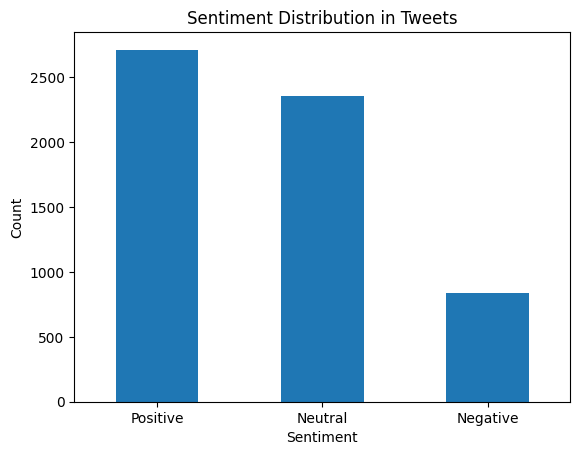

In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


# Assuming you have a DataFrame named 'df_main' with a 'text' column
# If not, replace this with your actual DataFrame

# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to each tweet
df_main['sentiment'] = df_main['text'].apply(get_sentiment)

# Count the sentiment categories
sentiment_counts = df_main['sentiment'].value_counts()

# Create a bar plot to visualize sentiment distribution
sentiment_counts.plot(kind='bar', rot=0)
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word Clouds:

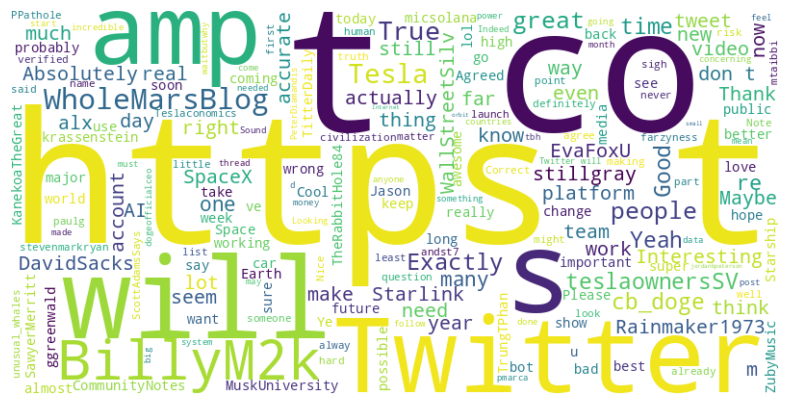

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df_main' with a 'text' column
# If not, replace this with your actual DataFrame

# Combine all the tweet text into a single string
text_combined = " ".join(df_main['text'])

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Correlations between retweets and favorites

In [9]:
# Calculate correlations between numerical columns
correlation_matrix = df_main[['retweets', 'favorites']].corr()

# Display the correlation matrix
print(correlation_matrix)

           retweets  favorites
retweets   1.000000   0.895825
favorites  0.895825   1.000000


# Time/ tweet analyse

<ipython-input-10-c31d698b640c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['date'] = pd.to_datetime(df_main['date'])


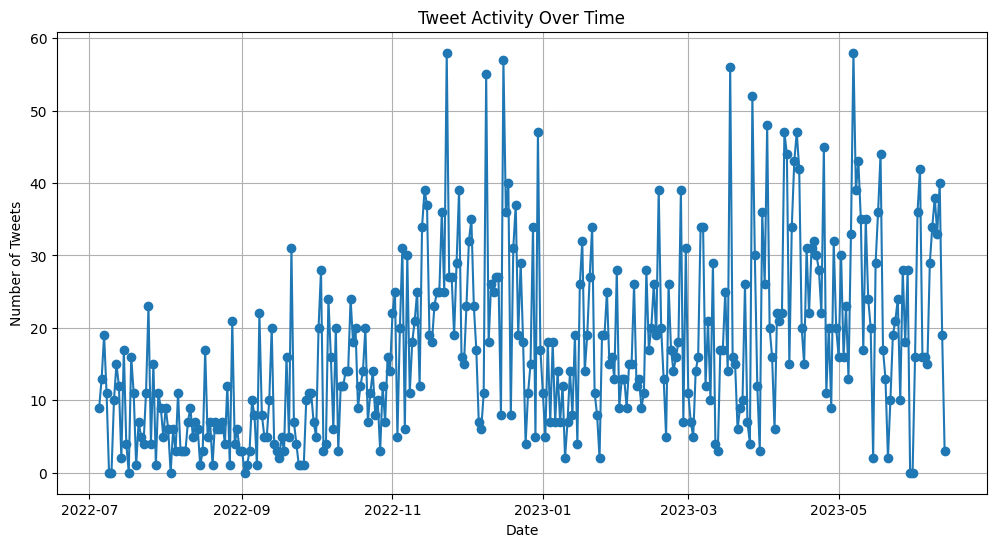

In [10]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df_main' with a 'date' column
# If not, replace this with your actual DataFrame

# Convert the 'date' column to datetime format
df_main['date'] = pd.to_datetime(df_main['date'])

# Set the 'date' column as the index
df_main.set_index('date', inplace=True)

# Resample data to visualize tweet activity over time (e.g., daily)
tweet_activity = df_main.resample('D').size()

# Plot a time series of tweet activity
plt.figure(figsize=(12, 6))
plt.plot(tweet_activity.index, tweet_activity.values, marker='o')
plt.title('Tweet Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

#Hashtag Analysis:

In [11]:
import re

# Assuming you have a DataFrame named 'df_main' with a 'text' column
# If not, replace this with your actual DataFrame

# Function to extract hashtags from tweet text
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags

# Apply the function to each tweet and create a list of hashtags
df_main['hashtags'] = df_main['text'].apply(extract_hashtags)

# Flatten the list of hashtags
hashtags_list = [hashtag for sublist in df_main['hashtags'] for hashtag in sublist]

# Count the occurrences of each hashtag
hashtag_counts = pd.Series(hashtags_list).value_counts()

# Display the top 10 most common hashtags
print(hashtag_counts.head(10))

#1                 4
#FreeSpeech        1
#3                 1
#deletefacebook    1
dtype: int64


<ipython-input-11-f184d00cf1de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['hashtags'] = df_main['text'].apply(extract_hashtags)


In [12]:
# Calculate the engagement rate for each tweet
df['engagement_rate'] = (df['retweets'] + df['favorites']) / df['user_followers']*1000

# Display the first few rows with engagement rates
print(df[['text', 'retweets', 'favorites', 'engagement_rate']].head())

                                                text  retweets  favorites  \
0  @BillyM2k I find the gold toe sock – inevitabl...       335       6542   
1                 Sock Con, the conference for socks      1451      30753   
2  Always something new for the magazine cover an...      1284      28610   
3                   @ExplainThisBob This guy gets it       131       3640   
4  Sock tech is so advanced that you can get pret...      1191      23790   

   engagement_rate  
0         0.067927  
1         0.318093  
2         0.295276  
3         0.037248  
4         0.246748  


# MODEL TRAINING

In [ ]:
#!pip install transformers
!pip install transformers[torch]

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Load the pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

- block_size is an important hyperparameter that determines the maximum length of sequences used during training. It's used to split your input text data into smaller chunks or blocks.
-Caching tokenized data can speed up training by avoiding the need to re-tokenize the text data every time you start training

In [6]:
# Convert your 'text' data to a list of strings
texts = df['text'].tolist()

# Specify a path for the text file where the text data will be saved
text_file_path = "text_data_willbesaved.txt"

# Write the text data to the text file
with open(text_file_path, 'w', encoding='utf-8') as file:
    file.write("\n".join(texts))

In [9]:
# Create a TextDataset using the text file
train_dataset = TextDataset(tokenizer=tokenizer, file_path=text_file_path, block_size=128, overwrite_cache=True)

# Data collator for language modeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-fine-tuned",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir="./logs",
)

In [10]:
# Add error handling for training
try:
    # Create a Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("./gpt2-fine-tuned")

except Exception as e:
    print("An error occurred during training:")
    print(str(e))


Step,Training Loss


Step,Training Loss


In [12]:
# Define the path for saving the model
model_path = '/content/drive/MyDrive/projects/Generative AI-Text/GenerativeAI-1'

# Save the model
model.save_pretrained(model_path)

# Model Evaluation

In [11]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load your fine-tuned GPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained("./gpt2-fine-tuned")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Set the model to generate text
model.eval()

# Input prompt for text generation
prompt = "Once upon a time"

# Tokenize the input prompt
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate text based on the input prompt
output = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50)

# Decode and print the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, the world was a better place.
@BillyM2k @BillyKerr @TheDailyBeast @DailyMail @WallStreetSilv @Twitter @WholeMarsBlog @Tesla @SpaceX @NASA @NASCAR @MuskUniversity @UniversityOfMiami @UCF @UofM @SawyerMerritt @FoxNews @NBCNews &amp; @CNN @NPR @NewSRB @FOXNewsRadio @CBSNewsDaily @WS
